---
# <font color="#CA3532">Deep Learning Fundamentals and Basic Tools (2024/2025) - Lab Assignment 3</font>
---

Last updated on 2024-10-11

Please report any bugs to luis.lago@uam.es



---

This third lab includes the following tasks:

- The implementation of simple models using [PyTorch](https://pytorch.org/).

- <font color="#CA3532">The implementation of a convolutional neural network for the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) problem, including hyperparameter optimization.</font>

### <font color="#CA3532">Clone the lab's github repo</font>

The easiest way of having all the lab material available from *Colab* is to clone our github repository:

In [1]:
!git clone https://github.com/luisferuam/DLFBT-LAB

Cloning into 'DLFBT-LAB'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 156 (delta 12), reused 19 (delta 5), pack-reused 128 (from 1)
Receiving objects: 100% (156/156), 7.53 MiB | 5.57 MiB/s, done.
Resolving deltas: 100% (77/77), done.


### <font color="#CA3532">Instructions</font>

- The assignment must be done in pairs.

- All the exercises are described in this notebook. You must code your solutions in the file ``dlfbt_lab3.py`` provided as part of the material. Just complete the sections in the code marked with ``TO-DO`` comments.

- The results for exercise 3, including the hyperparameter search, must be included at the end of this notebook.

- Create a zip file containing both the ``dlfbt_lab3.py`` and this notebook and upload it to the [course Moodle page](https://posgrado.uam.es/course/view.php?id=62684) before the due date.

- **Due date:** Friday, 2024-10-25, 23:59.

### <font color="#CA3532">Import the libraries</font>

The following code cells import the required libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pickle

from time import time
import shutil

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import torch

In [5]:
import sys
sys.path.append('DLFBT-LAB')
import dlfbt

### <font color="#CA3532">Introduction to PyTorch</font>

[PyTorch](https://pytorch.org/) is an open source machine learning framework that can be a good alternative to [TensorFlow](https://www.tensorflow.org/). It is usually the preferred option amongst the academic comunity because it offers more flexibility and hence it is easier to build custom models. However it lacks a high level layer like [Keras](https://keras.io/), so development could be a bit harder.

In this first part of the lab you will be introduced to the PyTorch framework.

Follow the introductory tutorial in the [PyTorch 60-Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) and then solve the exercises.


### <font color="#CA3532">Automatic differentiation with PyTorch</font>

As you have seen in the tutorial, the flag ``requires_grad=True`` is used when creating a tensor to indicate that we will compute gradients with respect to it:

In [6]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Now, whenever we perform an operation with this tensor, the new tensor that results from this operation includes a function to compute the gradient (``grad_fn``):

In [7]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


Another example follows:

In [8]:
z = y * y * 3
out = z.mean()

print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


To compute the gradients we must run the *backward pass* on the output tensor:

In [9]:
out.backward()

And then we can access the gradient using the ``grad`` field:

In [10]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


A simpler example, with scalar variables $x$ and $y$, follows:

$$
z = 2x^{2}y
$$

In [11]:
x = torch.tensor(2., requires_grad=True)
print(x)
y = torch.tensor(3., requires_grad=True)
print(y)
z = 2*x*x*y
print(z)

tensor(2., requires_grad=True)
tensor(3., requires_grad=True)
tensor(24., grad_fn=<MulBackward0>)


Backward pass:

In [12]:
z.backward()

Gradients:

$$
\frac{dz}{dx} = 4xy
$$

$$
\frac{dz}{dy} = 2x^{2}
$$


In [13]:
print(x.grad)
print(y.grad)

tensor(24.)
tensor(8.)


### <font color="#CA3532">Exercise 1: Gradient descent to find the minimum of a function</font>

In the file ``dlfbt_lab3.py``, complete the code of the function ``gradient_descent_pytorch(f, x0, learning_rate, niters)`` that finds a minimum of a function using gradient descent. The function receives the following arguments:

- ``f``: the function to minimize
- ``x0``: the initial value
- ``learning_rate``: the learning rate
- ``niters``: the number of iterations

The function returns a Numpy array with all the values of $x$.

You can run the following code to test your implementation.


In [14]:
from dlfbt_lab3 import gradient_descent_pytorch

Find the mimimum of the function $f(x) = (x-4)^{2}$:

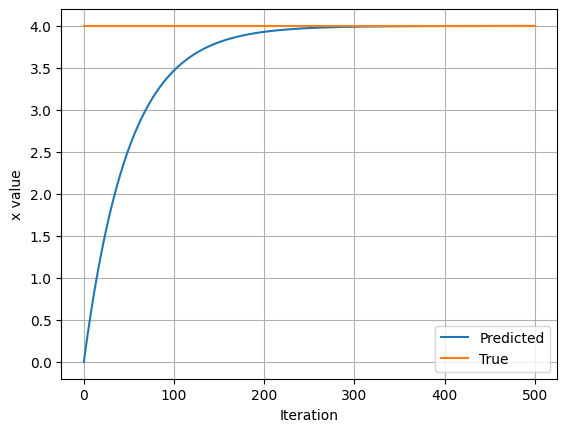

In [15]:
f = lambda x : (x - 4)**2
x_history = gradient_descent_pytorch(f, 0.0, 1.e-2, 500)

# Plot x versus iteration:
plt.plot(x_history)
plt.plot([0, 500], [4, 4])
plt.grid(True)
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

Find a local mimimum of the function $f(x) = \cos x$:

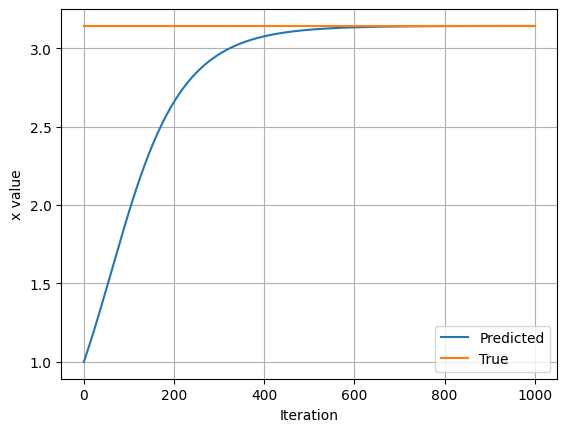

In [16]:
f = lambda x : torch.cos(x)
x_history = gradient_descent_pytorch(f, 1.0, 1.e-2, 1000)

# Plot x versus iteration:
plt.plot(x_history)
plt.plot([0, 1000], [np.pi, np.pi])
plt.grid(True)
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

### <font color="#CA3532">Exercise 2: Linear regression using pytorch</font>

Re-implement the ``LinearRegressionModel`` class of lab 1 using PyTorch.

Complete the code of the class ``LinearRegressionModel_pytorch`` by filling all the ``TO-DO`` blocks, so that it implements a Linear Regression model.

In [17]:
from dlfbt_lab3 import LinearRegressionModel_pytorch

Run the following tests to check your implementation.

Test the ``predict`` method:

In [18]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(noise=0.0, n=500)

linrm = LinearRegressionModel_pytorch()
linrm.w = torch.tensor(dg.a, requires_grad=True)
linrm.b = torch.tensor(dg.b, requires_grad=True)

y = linrm.predict(dg.x).detach()

tol = 1.e-8
assert y.shape == (500, 1)
assert np.abs(y - dg.t).max() < tol
assert linrm.get_loss(dg.x, dg.t) < tol

Test the ``compute_gradients`` method:

In [19]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(n=50000, seed=17)

linrm = LinearRegressionModel_pytorch()
linrm.w = torch.tensor(dg.a, requires_grad=True)
linrm.b = torch.tensor(dg.b, requires_grad=True)

db, dw = linrm.compute_gradients(dg.x, dg.t)

tol = 1.e-8
assert db.shape == (1, 1)
assert np.abs(db[0][0] + 0.00704326) < tol
assert dw.shape == (4, 1)
assert np.abs(dw[0][0] + 0.05353578) < tol
assert np.abs(dw[1][0] + 0.03276935) < tol
assert np.abs(dw[2][0] + 0.00337341) < tol
assert np.abs(dw[3][0] + 0.03293776) < tol

Test the ``fit`` method:

In [20]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=500, seed=17)

linrm = LinearRegressionModel_pytorch(2)
linrm.w = torch.tensor([[-2.0], [-2.0]], dtype=torch.float64, requires_grad=True)
linrm.b = torch.tensor([[-3.0]], dtype=torch.float64, requires_grad=True)

loss = linrm.fit(dg.x, dg.t, 0.01, 100)

tol = 1.e-8
assert np.abs(loss[-1] - 2.660068435196912) < tol

Plot loss vs iteration:

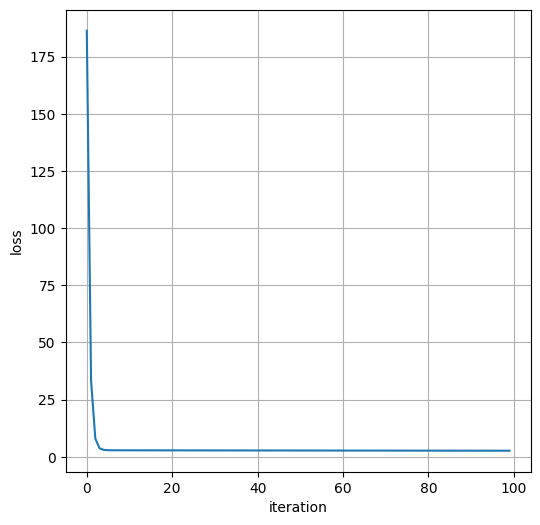

In [21]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()

### <font color="#CA3532">Neural networks in pytorch</font>



We will build a simple feedforward neural network to classify the digits in the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The next cell loads the data:

In [22]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(train_labels)

print(test_images.shape)
print(test_labels.shape)
print(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Definition of a class that implements the neural network (only the forward pass):

In [24]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # Note that we are not explicitly applying a softmax function
        return x

NN instantiation:

In [25]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


Network parameters:

In [26]:
params = list(net.parameters())
print(len(params))

for p in params:
  print(p.size())

4
torch.Size([64, 784])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


Let us apply this network to a sample image:

(28, 28)
target = 0


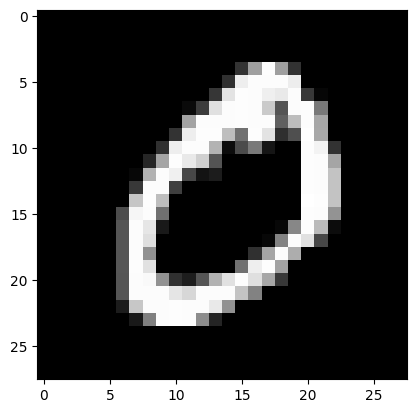

tensor([[ 13.5564, -35.2293,  -1.8026,   9.8072, -11.2711, -23.3381, -33.3275,
          34.2610, -16.0060,  14.8356]], grad_fn=<AddmmBackward0>)


In [27]:
print(train_images[1].shape)
print("target =", train_labels[1])
plt.imshow(train_images[1], cmap='gray')
plt.show()

# Image to tensor:
input = torch.tensor(train_images[1], dtype=torch.float)

# Predict:
out = net(input)
print(out)

Define the optimizer:

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Network training:

In [29]:
niters = 1000
hh = []
for it in range(niters):
    # Generate random mini-batch:
    ix = np.random.permutation(60000)[:1000]
    x = torch.tensor(train_images[ix], dtype=torch.float)
    y = torch.tensor(train_labels[ix], dtype=torch.long)

    # Reset gradients:
    optimizer.zero_grad()

    # Forward pass:
    outputs = net(x)
    loss = criterion(outputs, y)

    # Backward pass:
    loss.backward()

    # Update:
    optimizer.step()

    # Print stats:
    print('[%d] loss: %.3f' % (it + 1, loss.item()))
    hh.append(loss.item())

[1] loss: 25.788
[2] loss: 17.053
[3] loss: 14.752
[4] loss: 10.042
[5] loss: 7.334
[6] loss: 3.291
[7] loss: 1.789
[8] loss: 1.527
[9] loss: 1.570
[10] loss: 1.610
[11] loss: 1.451
[12] loss: 1.391
[13] loss: 1.428
[14] loss: 1.323
[15] loss: 1.368
[16] loss: 1.258
[17] loss: 1.277
[18] loss: 1.269
[19] loss: 1.226
[20] loss: 1.295
[21] loss: 1.098
[22] loss: 1.164
[23] loss: 1.120
[24] loss: 1.049
[25] loss: 1.021
[26] loss: 1.136
[27] loss: 1.043
[28] loss: 0.985
[29] loss: 0.943
[30] loss: 1.096
[31] loss: 1.025
[32] loss: 0.944
[33] loss: 0.980
[34] loss: 0.925
[35] loss: 0.877
[36] loss: 0.957
[37] loss: 0.867
[38] loss: 0.832
[39] loss: 0.811
[40] loss: 0.814
[41] loss: 0.758
[42] loss: 0.820
[43] loss: 0.863
[44] loss: 0.766
[45] loss: 0.868
[46] loss: 0.808
[47] loss: 0.806
[48] loss: 0.721
[49] loss: 0.733
[50] loss: 0.711
[51] loss: 0.804
[52] loss: 0.642
[53] loss: 0.780
[54] loss: 0.629
[55] loss: 0.616
[56] loss: 0.725
[57] loss: 0.730
[58] loss: 0.681
[59] loss: 0.628
[6

Plot:

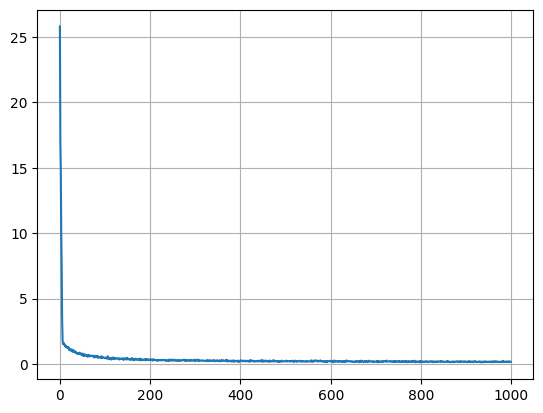

In [30]:
plt.plot(hh)
plt.grid(True)
plt.show()

Let us classify the same image after training:

(28, 28)
target = 0


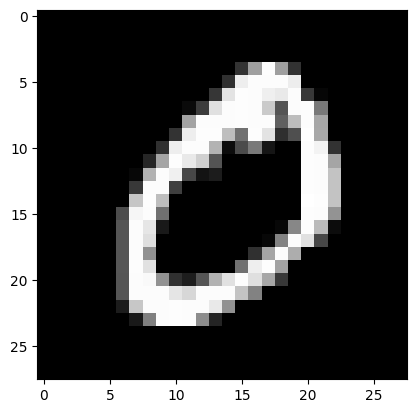

tensor([[  5.3381, -12.3085,  -2.7034,  -8.5577,  -7.7853, -12.4185,  -4.3150,
          -2.6751,  -6.2294,  -2.2491]], grad_fn=<AddmmBackward0>)


In [31]:
print(train_images[1].shape)
print("target =", train_labels[1])
plt.imshow(train_images[1], cmap='gray')
plt.show()

# Image to tensor:
input = torch.tensor(train_images[1], dtype=torch.float)

# Predict:
out = net(input)
print(out)

Now the highest output is assigned to the correct target.

Accuracy on training data:

In [32]:
input = torch.tensor(train_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == train_labels).sum() / 60000

0.9493

Accuracy on test data:

In [33]:
input = torch.tensor(test_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == test_labels).sum() / 10000

0.9419

PyTorch offers some utilities to process batches of data:


In [34]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

Let us build ``DataLoader``s for training and test data:

In [35]:
tensor_x = torch.tensor(train_images, dtype=torch.float)
tensor_y = torch.tensor(train_labels, dtype=torch.long)
train_dataset = TensorDataset(tensor_x, tensor_y)
train_dataloader = DataLoader(train_dataset, batch_size=1000, shuffle=True)

tensor_x = torch.tensor(test_images, dtype=torch.float)
tensor_y = torch.tensor(test_labels, dtype=torch.long)
test_dataset = TensorDataset(tensor_x,tensor_y)
test_dataloader = DataLoader(test_dataset, batch_size=1000, shuffle=True)

New network:

In [36]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Reimplement the training loop using epochs and batches:

In [37]:
nepochs = 10
hh = []
for it in range(nepochs):
  rloss = 0.0
  for x, t in train_dataloader:
    # Reset gradients to 0:
    optimizer.zero_grad()

    # Forward pass:
    outputs = net(x)
    loss = criterion(outputs, t)

    # Backward pass:
    loss.backward()

    # Actualización de los pesos:
    optimizer.step()

    # Acumulo loss:
    rloss += loss.item()

  # Imprimir loss de la época:
  print('[%d] loss: %.3f' % (it + 1, rloss))
  hh.append(rloss)

[1] loss: 177.841
[2] loss: 34.651
[3] loss: 26.463
[4] loss: 22.264
[5] loss: 20.332
[6] loss: 18.670
[7] loss: 17.590
[8] loss: 16.816
[9] loss: 16.068
[10] loss: 15.411


Accuracy on training and test data:

In [38]:
input = torch.tensor(train_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == train_labels).sum() / 60000

0.9299333333333333

In [39]:
input = torch.tensor(test_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == test_labels).sum() / 10000

0.9246

### <font color="#CA3532">Exercise 3: Recurrent Neural Networks with pytorch</font>

Complete the code of the classes ``RNN`` and ``LSTM`` in the file ``dlfbt_lab3.py``. Then run the following code to test your implementation.





Dataset creation:

In [40]:
def create_data_set(n, seq_len, pattern):
  x = np.random.randint(0, 2, (n, seq_len))

  x_as_string = [''.join([chr(c+48) for c in a]) for a in x]
  t = np.array([pattern in s for s in x_as_string])*1

  return x, x_as_string, t

In [41]:
n = 50000
seq_len = 25
pattern = '11011'

x, x_as_string, t = create_data_set(n, seq_len, pattern)
xval, xval_as_string, tval = create_data_set(n, seq_len, pattern)

for s, c in zip(x_as_string[:20], t[:20]):
  print(s, c)

print('Class mean (training):', t.mean())
print('Class mean (validation):', tval.mean())

0101010010010000100100010 0
1000111100100100000000000 0
1001110100101111000110001 0
1100000000111001101100110 1
1110001011100000001010101 0
0011011100101111011110111 1
0010110001010100101100011 0
0000001111000010111011011 1
1111000001011100001110010 0
0010111101001011110101111 0
1101000001010001010100110 0
0111011100010011100101000 1
1101001111011001000001001 1
1101100101010110111001001 1
0001110110001101001110011 1
1010011111100000011011101 1
0001010100110111000111111 1
0100111111111011100110010 1
1110110111111100010111101 1
0111000001100011111110000 0
Class mean (training): 0.46782
Class mean (validation): 0.46948


In [42]:
print(x.shape)
print(t.shape)

(50000, 25)
(50000,)


Data loader for generating batches:

In [43]:
batch_size = 32

tensor_x = torch.tensor(x, dtype=torch.float)
tensor_t = torch.tensor(t, dtype=torch.long)
train_dataset = TensorDataset(tensor_x[:, :, None], tensor_t)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Test for the RNN implementation:

In [44]:
from dlfbt_lab3 import RNN

In [45]:
class Network(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Network, self).__init__()

        self.rnn = RNN(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)

    def forward(self, input, hidden):
        x = self.rnn(input, hidden)
        output = self.h2o(x)

        return output

In [46]:
hidden_size = 10
net = Network(1, hidden_size, 2)

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [48]:
nepochs = 10
hh = []
acc = []
for it in range(nepochs):
  rloss = 0.0
  racc = 0.0
  for xbatch, tbatch in train_dataloader:
    # Reset gradients to 0:
    optimizer.zero_grad()

    # Forward pass:
    outputs = net(xbatch, torch.zeros(xbatch.shape[0], hidden_size))
    loss = criterion(outputs, tbatch)

    # Backward pass:
    loss.backward()

    # Weights update:
    optimizer.step()

    # Loss:
    rloss += loss.item()

    # Accuracy:
    preds = np.argmax(outputs.detach(), axis=1)
    racc += (preds == tbatch).numpy().mean()

  # Prints:
  rloss /= len(train_dataloader)
  racc /= len(train_dataloader)
  print('[%d] loss = %.3f, acc = %.3f' % (it + 1, rloss, racc))
  hh.append(rloss)
  acc.append(racc)

[1] loss = 0.610, acc = 0.656
[2] loss = 0.522, acc = 0.737
[3] loss = 0.182, acc = 0.937
[4] loss = 0.170, acc = 0.952
[5] loss = 0.030, acc = 0.996
[6] loss = 0.310, acc = 0.913
[7] loss = 0.092, acc = 0.981
[8] loss = 0.104, acc = 0.981
[9] loss = 0.020, acc = 1.000
[10] loss = 0.010, acc = 1.000


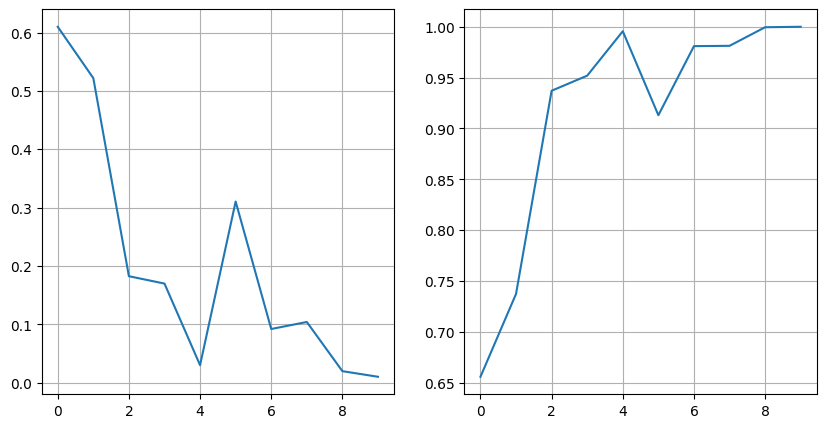

In [49]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hh)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(acc)
plt.grid(True)
plt.show()

Test for the LSTM implementation:

In [50]:
from dlfbt_lab3 import LSTM

In [51]:
class Network(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Network, self).__init__()

        self.lstm = LSTM(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)

    def forward(self, input, hidden, cell):
        x = self.lstm(input, hidden, cell)
        output = self.h2o(x)

        return output


In [52]:
hidden_size = 10
net = Network(1, hidden_size, 2)

In [53]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [54]:
nepochs = 10
hh = []
acc = []
for it in range(nepochs):
  rloss = 0.0
  racc = 0.0
  for xbatch, tbatch in train_dataloader:
    # Reset gradients to 0:
    optimizer.zero_grad()

    # Forward pass:
    outputs = net(xbatch, torch.zeros(xbatch.shape[0], hidden_size), torch.zeros(xbatch.shape[0], hidden_size))
    loss = criterion(outputs, tbatch)

    # Backward pass:
    loss.backward()

    # Weights update:
    optimizer.step()

    # Loss:
    rloss += loss.item()

    # Accuracy:
    preds = np.argmax(outputs.detach(), axis=1)
    racc += (preds == tbatch).numpy().mean()

  # Prints:
  rloss /= len(train_dataloader)
  racc /= len(train_dataloader)
  print('[%d] loss = %.3f, acc = %.3f' % (it + 1, rloss, racc))
  hh.append(rloss)
  acc.append(racc)

[1] loss = 0.611, acc = 0.660
[2] loss = 0.527, acc = 0.733
[3] loss = 0.092, acc = 0.971
[4] loss = 0.015, acc = 0.999
[5] loss = 0.005, acc = 1.000
[6] loss = 0.010, acc = 0.999
[7] loss = 0.002, acc = 1.000
[8] loss = 0.001, acc = 1.000
[9] loss = 0.000, acc = 1.000
[10] loss = 0.000, acc = 1.000


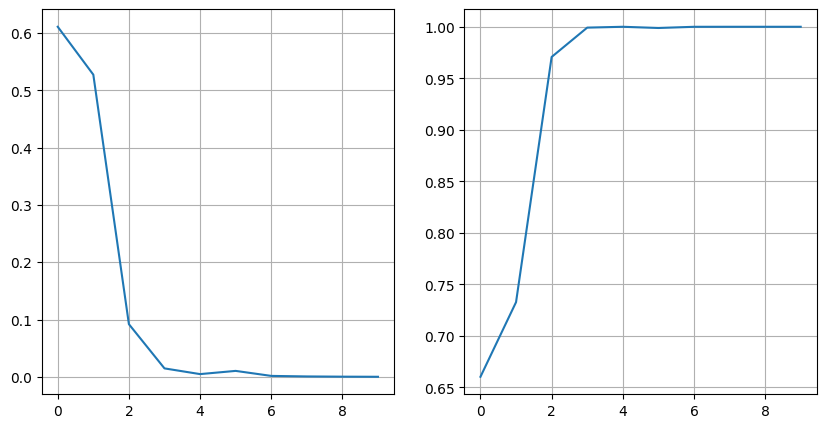

In [55]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hh)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(acc)
plt.grid(True)
plt.show()

### <font color="#CA3532">Exercise 4: Language modeling</font>

Apply your recurrent networks to a language modeling problem (predict the next character). **TO DO...**